# Diabetes Prediction

## Table of Contents
1. [Introduction](#introduction)
3. [Exploratory Data Analysis](#exploratory-data-analysis)
4. [Logistic Regression Models](#LogisticRegression)
5. [Decision Tree](#DecisionTree)
6. [XGBoosting](#XGBoosting)
7. [Random Forest](#RandForest)
8. [Deep Neural Network](#DNN)
9. [Stacking Model](#Stack1)
10. [Robustness](#Overfitting)
11. [Test set Results](#Results)
12. [Conclusion](#Conclusion)

## Introduction


In [1]:
import pandas as pd
import seaborn 
import warnings
warnings.filterwarnings('ignore')

# https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicat
# dataset ^^^
data = pd.read_csv("diabetes_012.csv", header=0)
data.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


## exploratory-data-analysis

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
Diabetes_012,,,,,,,,,,,,,,,,,,,,,
0.0,213703,213703,213703,213703,213703,213703,213703,213703,213703,213703,...,213703,213703,213703,213703,213703,213703,213703,213703,213703,213703
1.0,4631,4631,4631,4631,4631,4631,4631,4631,4631,4631,...,4631,4631,4631,4631,4631,4631,4631,4631,4631,4631
2.0,35346,35346,35346,35346,35346,35346,35346,35346,35346,35346,...,35346,35346,35346,35346,35346,35346,35346,35346,35346,35346


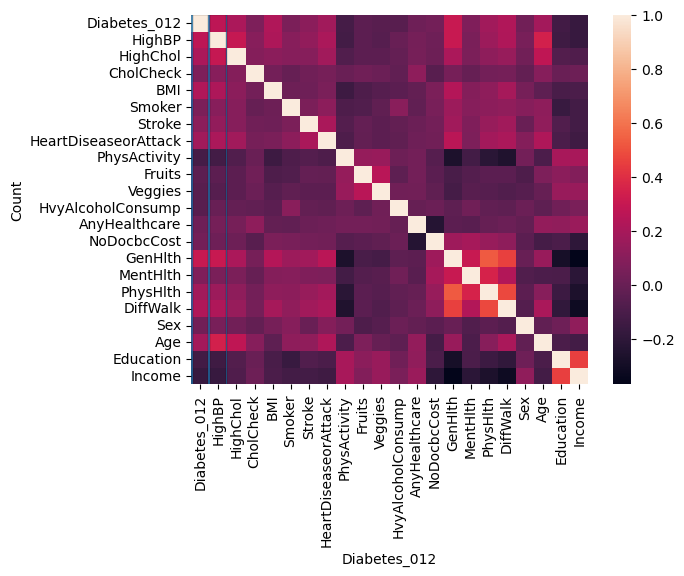

In [2]:
#filtered out prediabetes
#diabetes= data.query('Diabetes_012 == 0 or Diabetes_012 ==2')
seaborn.heatmap(data.corr(numeric_only=True))
seaborn.histplot(data=data, x= data.Diabetes_012)

data.groupby(['Diabetes_012']).count()

<Axes: xlabel='Diabetes_012', ylabel='Count'>

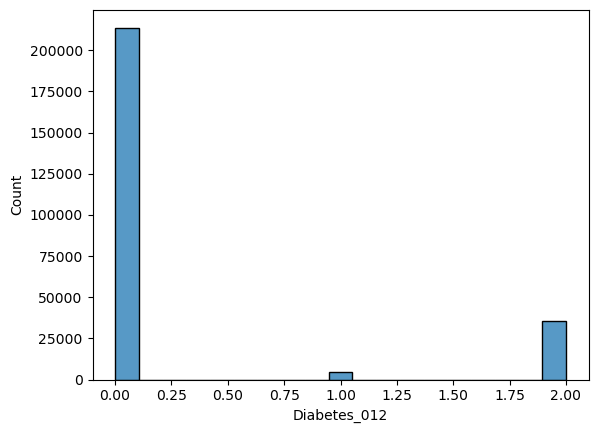

In [ ]:
seaborn.histplot(data=data, x= data.Diabetes_012)
import pandas as pd
import matplotlib.pyplot as plt


13.9% of the respondents in the survey have diabetes, 1.8% have prediabetes, and 84.2% do not have diabetes. Our benchmark for accuracy will be 84.2% since a naive model of predicting no one has diabetes will be at that accuracy. 

In [5]:
data.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


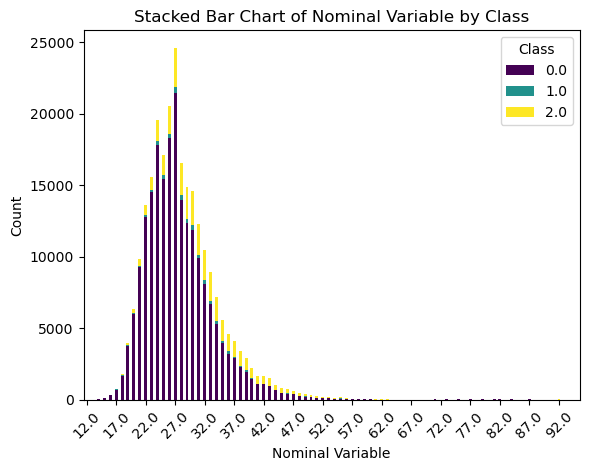

In [10]:

counts = data.groupby(['BMI', 'Diabetes_012']).size().unstack(fill_value=0)

counts.plot(kind='bar', stacked=True, colormap='viridis')

# Labels and title
plt.xlabel("Nominal Variable")
plt.ylabel("Count")
plt.title("Stacked Bar Chart of Nominal Variable by Class")
plt.legend(title="Class")
plt.xticks(ticks=range(0, len(counts), 5), rotation=45)  # Show every 5th label
plt.show()

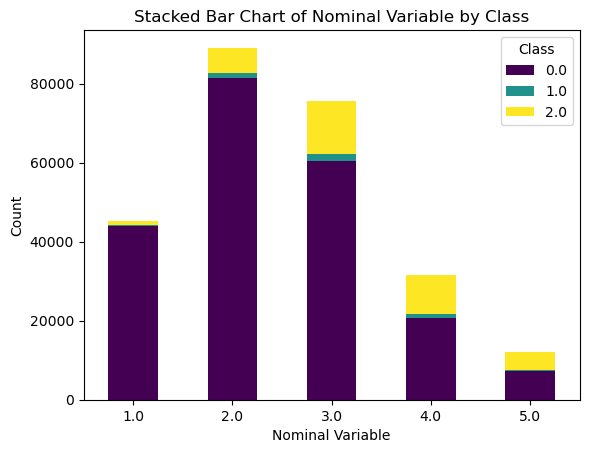

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


counts = data.groupby(['GenHlth', 'Diabetes_012']).size().unstack(fill_value=0)

counts.plot(kind='bar', stacked=True, colormap='viridis')

# Labels and title
plt.xlabel("Nominal Variable")
plt.ylabel("Count")
plt.title("Stacked Bar Chart of Nominal Variable by Class")
plt.legend(title="Class")
plt.xticks(rotation=0)  # Keep labels horizontal
plt.show()


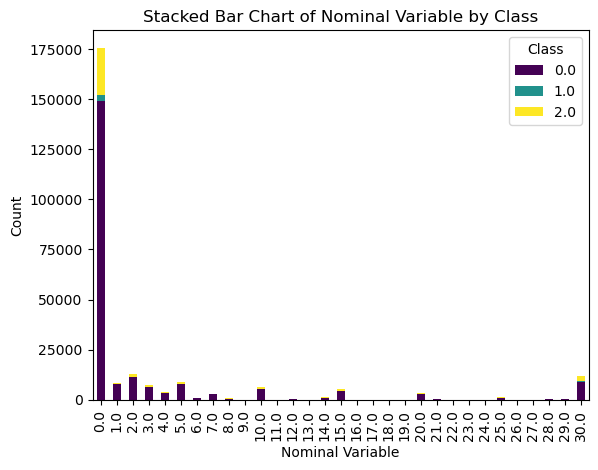

In [12]:

counts = data.groupby(['MentHlth', 'Diabetes_012']).size().unstack(fill_value=0)

counts.plot(kind='bar', stacked=True, colormap='viridis')

# Labels and title
plt.xlabel("Nominal Variable")
plt.ylabel("Count")
plt.title("Stacked Bar Chart of Nominal Variable by Class")
plt.legend(title="Class")
plt.xticks(rotation=90)  # Keep labels horizontal
plt.show()

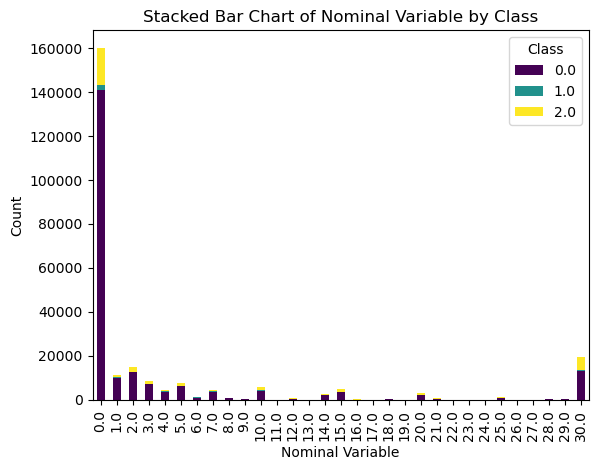

In [14]:

counts = data.groupby(['PhysHlth', 'Diabetes_012']).size().unstack(fill_value=0)

counts.plot(kind='bar', stacked=True, colormap='viridis')

# Labels and title
plt.xlabel("Nominal Variable")
plt.ylabel("Count")
plt.title("Stacked Bar Chart of Nominal Variable by Class")
plt.legend(title="Class")
plt.xticks( rotation=90)  # Show every 5th label
plt.show()

In [4]:
data['PhysHlth'].corr(data['GenHlth'])  #.52
data['PhysHlth'].corr(data['DiffWalk']) #.478
data['Education'].corr(data['Income']) #.448
data['DiffWalk'].corr(data['GenHlth']) #.456

0.45691950252819163

## Correlation of variables
    The variable listed above have the highest correlation with each other. The variance inflation factor will need to be checked when implementing the logistic regression model. For the rest of the models this correlation should be fine. 

<Axes: xlabel='BMI', ylabel='Count'>

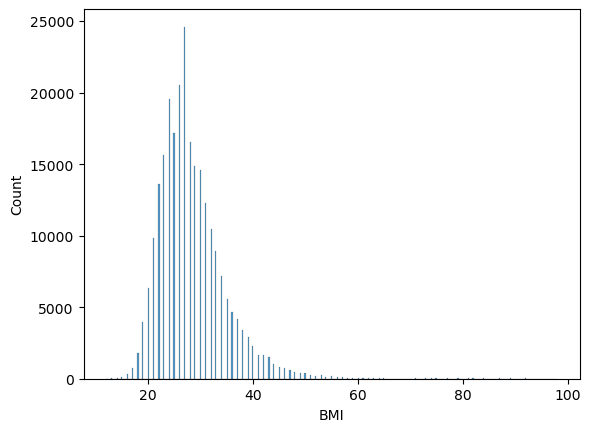

In [5]:
seaborn.histplot(data['BMI'])

In [15]:
# change mentHlth and physHlth to 3 categories (1-5, 5-14, 14+)

# Custom binning
bins = [-1, 5, 14, 32]
labels = [0, 1, 2]
data['MentBin'] = pd.cut(data['MentHlth'], bins=bins, labels=labels)
labels = [0, 1, 2]
data['PhysBin'] = pd.cut(data['PhysHlth'], bins=bins, labels=labels)
data = data.drop(['MentHlth', 'PhysHlth'], axis=1)
data.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,DiffWalk,Sex,Age,Education,Income,MentBin,PhysBin
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,1.0,0.0,9.0,4.0,3.0,2,2
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,7.0,6.0,1.0,0,0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,1.0,0.0,9.0,4.0,8.0,2,2
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,11.0,3.0,6.0,0,0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,11.0,5.0,4.0,0,0


In [21]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

scaler = StandardScaler()
data['BMI_standardized'] = scaler.fit_transform(data[['BMI']])
scaler = MinMaxScaler()
data['BMI_scaled'] = scaler.fit_transform(data[['BMI']])

In [22]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size=.3, random_state=1)

y_train = train['Diabetes_012']
y_test = test['Diabetes_012']

x_train = train.loc[:, train.columns != 'Diabetes_012']
x_test = test.loc[:, test.columns != 'Diabetes_012']

In [42]:
from imblearn.under_sampling import RandomUnderSampler

# Example dataset (X = features, y = target variable with three classes)
 # Features
 # Target variable (with three classes)

# Initialize the undersampler
undersampler = RandomUnderSampler(sampling_strategy='auto', random_state=1)

# Apply undersampling
XU, yu = undersampler.fit_resample(x_train, y_train)

# Convert back to DataFrame
undersampled_data = pd.DataFrame(XU, columns=x_train.columns)
undersampled_data['Diabetes_012'] = yu

# Display class distribution after undersampling
print("Class Distribution After Undersampling:\n", undersampled_data['Diabetes_012'].value_counts())


Class Distribution After Undersampling:
 Diabetes_012
0.0    3283
1.0    3283
2.0    3283
Name: count, dtype: int64


In [30]:
y_train.groupby(y_train).count()


Diabetes_012
0.0    149599
1.0      3283
2.0     24694
Name: Diabetes_012, dtype: int64

In [43]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN

# First, undersample majority class to a reasonable level (e.g., 20,000 per class)
undersampler = RandomUnderSampler(sampling_strategy={0: 20000, 1: 3283, 2: 20000}, random_state=1)
X_under, y_under = undersampler.fit_resample(x_train, y_train)

# Then, apply SMOTE to increase the smallest class
smote = SMOTE(sampling_strategy={2: 20000}, random_state=1)
X_US, yus = smote.fit_resample(X_under, y_under)



In [114]:
 

Evaluation = pd.DataFrame({
    "Model":[],
    "Accuracy":[],
    "nodiabetes_f1_score":[],
    "prediabetes_f1_score":[],
    "diabetes_f1_score":[]

})

## LogisticRegression 

In [45]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

X = x_train
X = X.drop('Education', axis=1)
X = X.drop('AnyHealthcare', axis=1)
X = X.drop('CholCheck', axis=1)
X = X.drop('BMI', axis=1)
X = X.drop('BMI_scaled', axis=1) 

vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)

XUl = XU
XUl = XUl.drop('Education', axis=1)
XUl = XUl.drop('AnyHealthcare', axis=1)
XUl = XUl.drop('CholCheck', axis=1)
XUl = XUl.drop('BMI', axis=1)
XUl = XUl.drop('BMI_scaled', axis=1) 

XUSl = X_US
XUSl = XUSl.drop('Education', axis=1)
XUSl = XUSl.drop('AnyHealthcare', axis=1)
XUSl = XUSl.drop('CholCheck', axis=1)
XUSl = XUSl.drop('BMI', axis=1)
XUSl = XUSl.drop('BMI_scaled', axis=1) 

                 Feature       VIF
0                 HighBP  2.320915
1               HighChol  2.035498
2                 Smoker  1.930183
3                 Stroke  1.125828
4   HeartDiseaseorAttack  1.280262
5           PhysActivity  4.324398
6                 Fruits  3.005562
7                Veggies  5.556049
8      HvyAlcoholConsump  1.084047
9            NoDocbcCost  1.174489
10               GenHlth  8.369493
11              DiffWalk  1.831407
12                   Sex  1.895872
13                   Age  8.607877
14                Income  8.061111
15               MentBin  1.388395
16               PhysBin  1.883607
17      BMI_standardized  1.139171


In [46]:
# dropped because of high p-value where p > .10
X = X.drop(['Fruits','MentBin','DiffWalk',
                      'NoDocbcCost','HeartDiseaseorAttack','PhysActivity',
                      'Smoker','Sex','Veggies','Stroke'], axis=1)

In [116]:
import statsmodels.api as sm

X = sm.add_constant(X)
logistic_model = sm.MNLogit(y_train, X)
log_results = logistic_model.fit()

print(log_results.summary())


Optimization terminated successfully.
         Current function value: 0.404055
         Iterations 8
                          MNLogit Regression Results                          
Dep. Variable:           Diabetes_012   No. Observations:               177576
Model:                        MNLogit   Df Residuals:                   177558
Method:                           MLE   Df Model:                           16
Date:                Mon, 03 Mar 2025   Pseudo R-squ.:                  0.1797
Time:                        13:54:25   Log-Likelihood:                -71751.
converged:                       True   LL-Null:                       -87466.
Covariance Type:            nonrobust   LLR p-value:                     0.000
   Diabetes_012=1       coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -5.6405      0.107    -52.805      0.000      -5.850      -5.431
HighBP  

In [118]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

X_test = x_test
X_test = X_test.drop( ['Education','AnyHealthcare','CholCheck',
                      'Fruits','MentBin','DiffWalk',
                      'NoDocbcCost','HeartDiseaseorAttack','PhysActivity',
                      'Smoker','Sex','Veggies','Stroke', 'BMI', 'BMI_scaled'], axis=1)


X_test = sm.add_constant(X_test)

pred_prob = log_results.predict(X_test)


pred_class = pred_prob.idxmax(axis=1)
accuracy_log = accuracy_score(y_test, pred_class)
conf_matrix_log = confusion_matrix(y_test, pred_class)
print("Confusion Matrix:\n", conf_matrix_log)
print("Classification Report:\n", classification_report(y_test, pred_class))
report = classification_report(y_test, pred_class, output_dict=True)


Evaluation = Evaluation._append({
    "Model": "Logistic Regression",
    "Accuracy": accuracy_log,
    "nodiabetes_f1_score": report['0.0']['f1-score'],
    "prediabetes_f1_score": report['1.0']['f1-score'],
    "diabetes_f1_score": report['2.0']['f1-score']
}, ignore_index= True)
  

Confusion Matrix:
 [[62652     0  1452]
 [ 1242     0   106]
 [ 8935     0  1717]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.86      0.98      0.92     64104
         1.0       0.00      0.00      0.00      1348
         2.0       0.52      0.16      0.25     10652

    accuracy                           0.85     76104
   macro avg       0.46      0.38      0.39     76104
weighted avg       0.80      0.85      0.81     76104



An accuracy of 85% or missclassification rate of nearly 15% is not a great model considering that a model that purely predicts no diabetes would have a missclassfication rate of nearly 16%. A technique of undersampling the majority class could be tried. 

## DecisionTree

In [119]:
#decision tree hyperparameter tuning
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, make_scorer

f1_scorer = make_scorer(f1_score, average='macro')
param_grid = {
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

dt = DecisionTreeClassifier()
grid_search = GridSearchCV(dt, param_grid, cv=5, scoring=f1_scorer)
grid_search.fit(x_train, y_train)

print("Best Parameters:", grid_search.best_params_)



Best Parameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [83]:
# training and testing decision tree

gini_tree = DecisionTreeClassifier(random_state=1, criterion="entropy", class_weight='balanced', max_depth=5, min_samples_leaf=1, min_samples_split=2)
gini_tree.fit(x_train, y_train)
gini_pred = gini_tree.predict(x_test)

accuracy = accuracy_score(y_test, gini_pred)
print(f"Accuracy: {accuracy:.4f}")
conf_matrix_log = confusion_matrix(y_test, gini_pred)
print("Confusion Matrix:\n", conf_matrix_log)
print("Classification Report:\n", classification_report(y_test, gini_pred))

Evaluation = Evaluation._append({
    "Model": "Decision Tree Entropy",
    "Accuracy": accuracy,
    "no diabetes f1 score": report['0']['f1-score'],
    "prediabetes f1 score": report['1']['f1-score'],
    "diabetes f1 score": report['2']['f1-score']
    
}, ignore_index= True)

Accuracy: 0.6016
Confusion Matrix:
 [[38733 12312 13059]
 [  335   411   602]
 [ 1543  2466  6643]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.95      0.60      0.74     64104
         1.0       0.03      0.30      0.05      1348
         2.0       0.33      0.62      0.43     10652

    accuracy                           0.60     76104
   macro avg       0.44      0.51      0.41     76104
weighted avg       0.85      0.60      0.68     76104



TypeError: string indices must be integers, not 'str'

In [84]:


param_grid = {
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

dt = DecisionTreeClassifier()
grid_search = GridSearchCV(dt, param_grid, cv=5, scoring='accuracy')
grid_search.fit(XU, yu)

print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [89]:

gini_tree = DecisionTreeClassifier(random_state=1, criterion="gini", max_depth=5, min_samples_leaf=1, min_samples_split=2)
gini_tree.fit(XU, yu)
gini_pred = gini_tree.predict(x_test)

accuracy = accuracy_score(y_test, gini_pred)
print(f"Accuracy: {accuracy:.4f}")
conf_matrix_log = confusion_matrix(y_test, gini_pred)
print("Confusion Matrix:\n", conf_matrix_log)
print("Classification Report:\n", classification_report(y_test, gini_pred))

Evaluation = Evaluation._append({
    "Model": "Decision Tree undersampled",
    "Accuracy": accuracy,
    "no diabetes f1 score": report['0']['f1-score'],
    "prediabetes f1 score": report['1']['f1-score'],
    "diabetes f1 score": report['2']['f1-score']
    
}, ignore_index= True)

Accuracy: 0.5857
Confusion Matrix:
 [[37772 14367 11965]
 [  336   428   584]
 [ 1447  2831  6374]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.95      0.59      0.73     64104
         1.0       0.02      0.32      0.05      1348
         2.0       0.34      0.60      0.43     10652

    accuracy                           0.59     76104
   macro avg       0.44      0.50      0.40     76104
weighted avg       0.85      0.59      0.67     76104



TypeError: string indices must be integers, not 'str'

In [86]:


param_grid = {
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

dt = DecisionTreeClassifier()
grid_search = GridSearchCV(dt, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_US, yus)

print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 2, 'min_samples_split': 2}


In [ ]:

gini_tree = DecisionTreeClassifier(random_state=1, criterion="gini", max_depth=7, min_samples_leaf=2, min_samples_split=2)
gini_tree.fit(X_US, yus)
gini_pred = gini_tree.predict(x_test)

accuracy = accuracy_score(y_test, gini_pred)
print(f"Accuracy: {accuracy:.4f}")
conf_matrix_log = confusion_matrix(y_test, gini_pred)
print("Confusion Matrix:\n", conf_matrix_log)
print("Classification Report:\n", classification_report(y_test, gini_pred))

Evaluation = Evaluation._append({
    "Model": "Decision Tree SMOTE",
    "Accuracy": accuracy,
    "no diabetes f1 score": report['0']['f1-score'],
    "prediabetes f1 score": report['1']['f1-score'],
    "diabetes f1 score": report['2']['f1-score']
    
}, ignore_index= True)

Accuracy: 0.6963
Confusion Matrix:
 [[44600    10 19494]
 [  478     0   870]
 [ 2261     3  8388]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.94      0.70      0.80     64104
         1.0       0.00      0.00      0.00      1348
         2.0       0.29      0.79      0.43     10652

    accuracy                           0.70     76104
   macro avg       0.41      0.49      0.41     76104
weighted avg       0.83      0.70      0.73     76104



TypeError: string indices must be integers, not 'str'

## XGBoosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gradb_clf = GradientBoostingClassifier( 
    n_estimators=25,    
    learning_rate=0.1,   
    max_depth=5,         
    random_state=1
    )


gradb_clf.fit(x_train, y_train)
gradb_pred = gradb_clf.predict(x_test)

accuracy = accuracy_score(y_test, gradb_pred)
print(f"Accuracy: {accuracy:.4f}")
conf_matrix_log = confusion_matrix(y_test, gradb_pred)
print("Confusion Matrix:\n", conf_matrix_log)
print("Classification Report:\n", classification_report(y_test, gradb_pred))

Evaluation = Evaluation._append({
    "Model": "Gradient Boosting",
    "Accuracy": accuracy,
    "no diabetes f1 score": report['0']['f1-score'],
    "prediabetes f1 score": report['1']['f1-score'],
    "diabetes f1 score": report['2']['f1-score']
}, ignore_index= True)

Accuracy: 0.8497
Confusion Matrix:
 [[63217     1   886]
 [ 1261     1    86]
 [ 9207     0  1445]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.86      0.99      0.92     64104
         1.0       0.50      0.00      0.00      1348
         2.0       0.60      0.14      0.22     10652

    accuracy                           0.85     76104
   macro avg       0.65      0.37      0.38     76104
weighted avg       0.82      0.85      0.80     76104



In [91]:
# hyperparameter tuning for xgboost
import optuna
import xgboost as xgb
from sklearn.metrics import accuracy_score

# Convert categorical columns to numerical values
x_train_encoded = pd.get_dummies(x_train)
x_test_encoded = pd.get_dummies(x_test)

def objective(trial):
    param = {
        'objective': 'binary:logistic',
        'eval_metric': 'logloss',
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
        'n_estimators': trial.suggest_int('n_estimators', 50, 300),
        'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1.0)
    }
    
    xgb_clf = xgb.XGBClassifier(**param)
    xgb_clf.fit(x_train_encoded, y_train)
    preds = xgb_clf.predict(x_test_encoded)
    return accuracy_score(y_test, preds)

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=20)

print("Best Hyperparameters:", study.best_params_)


[I 2025-03-03 12:13:36,610] A new study created in memory with name: no-name-cd8d948e-d2b8-47c2-a5bf-c2b86141ba61
[I 2025-03-03 12:13:43,809] Trial 0 finished with value: 0.850783138862609 and parameters: {'max_depth': 10, 'learning_rate': 0.025731625851522378, 'n_estimators': 263, 'subsample': 0.996322449452851, 'colsample_bytree': 0.500204852235759}. Best is trial 0 with value: 0.850783138862609.
[I 2025-03-03 12:13:45,177] Trial 1 finished with value: 0.850454641017555 and parameters: {'max_depth': 6, 'learning_rate': 0.23691758134104415, 'n_estimators': 73, 'subsample': 0.8132965347654109, 'colsample_bytree': 0.655347937046628}. Best is trial 0 with value: 0.850783138862609.
[I 2025-03-03 12:13:47,078] Trial 2 finished with value: 0.850940817828235 and parameters: {'max_depth': 7, 'learning_rate': 0.07943145527808132, 'n_estimators': 103, 'subsample': 0.9477432283976874, 'colsample_bytree': 0.7175645107252768}. Best is trial 2 with value: 0.850940817828235.
[I 2025-03-03 12:13:49,4

AttributeError: 'Study' object has no attribute 'best_params_'

In [ ]:
#max_depth': 3, 'learning_rate': 0.15282284281410227, 'n_estimators': 150, 'subsample': 0.5515004512119388, 'colsample_bytree': 0.9762623857376225}. Best is trial 14 with value: 0.8511116367076632.
from sklearn.ensemble import GradientBoostingClassifier

gradb_clf = GradientBoostingClassifier( 
    n_estimators=150,    
    learning_rate=0.15282284281410227,   
    max_depth=3,  
    subsample= 0.5515004512119388,
          
    random_state=1
    )


gradb_clf.fit(x_train, y_train)
gradb_pred = gradb_clf.predict(x_test)

accuracy = accuracy_score(y_test, gradb_pred)
print(f"Accuracy: {accuracy:.4f}")
conf_matrix_log = confusion_matrix(y_test, gradb_pred)
print("Confusion Matrix:\n", conf_matrix_log)
print("Classification Report:\n", classification_report(y_test, gradb_pred))

Evaluation = Evaluation._append({
    "Model": "Gradient Boosting",
    "Accuracy": accuracy,
    "no diabetes f1 score": report['0']['f1-score'],
    "prediabetes f1 score": report['1']['f1-score'],
    "diabetes f1 score": report['2']['f1-score']
}, ignore_index= True)

Accuracy: 0.8506
Confusion Matrix:
 [[62720     1  1383]
 [ 1215     1   132]
 [ 8636     1  2015]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.86      0.98      0.92     64104
         1.0       0.33      0.00      0.00      1348
         2.0       0.57      0.19      0.28     10652

    accuracy                           0.85     76104
   macro avg       0.59      0.39      0.40     76104
weighted avg       0.81      0.85      0.81     76104



TypeError: string indices must be integers, not 'str'

## RandForest

In [ ]:
from sklearn.ensemble import BaggingClassifier

bagging_clf = BaggingClassifier(
    n_estimators=50,      
    max_samples=0.6,      
    max_features=0.7,     
    random_state=1
)

bagging_clf.fit(x_train, y_train)
y_pred = bagging_clf.predict(x_test)

accuracy =accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_score(y_test, y_pred))
conf_matrix_log = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix_log)
print("Classification Report:\n", classification_report(y_test, y_pred))

Evaluation = Evaluation._append({
    "Model": "Bagging",
    "Accuracy": accuracy,
    "no diabetes f1 score": report['0']['f1-score'],
    "prediabetes f1 score": report['1']['f1-score'],
    "diabetes f1 score": report['2']['f1-score']
    
}, ignore_index= True)

Accuracy: 0.8459870703248187
Confusion Matrix:
 [[63282     0   822]
 [ 1275     0    73]
 [ 9551     0  1101]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.85      0.99      0.92     64104
         1.0       0.00      0.00      0.00      1348
         2.0       0.55      0.10      0.17     10652

    accuracy                           0.85     76104
   macro avg       0.47      0.36      0.36     76104
weighted avg       0.80      0.85      0.80     76104



c:\Users\corkr\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\corkr\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\corkr\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [120]:
# hyperparameter tuning for random forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

rf = RandomForestClassifier()
random_search = RandomizedSearchCV(rf, param_distributions=param_dist, n_iter=20, cv=5, scoring=f1_scorer, n_jobs=-1)
random_search.fit(x_train, y_train)

print("Best Parameters:", random_search.best_params_)


Best Parameters: {'n_estimators': 50, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 30, 'bootstrap': False}


In [121]:
#Best Parameters: {'n_estimators': 50, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 30, 'bootstrap': False}
rf_clf = RandomForestClassifier(
    n_estimators=50,      
    min_samples_split=2,   
    min_samples_leaf=1,    
    max_depth=30,          
    bootstrap=False,        
    random_state=1
)

rf_clf.fit(x_train, y_train)
rf_pred = rf_clf.predict(x_test)

accuracy = accuracy_score(y_test, rf_pred)
print(f"Accuracy: {accuracy:.4f}")
conf_matrix_log = confusion_matrix(y_test, rf_pred)
print("Confusion Matrix:\n", conf_matrix_log)
print("Classification Report:\n", classification_report(y_test, rf_pred))

Evaluation = Evaluation._append({
    "Model": "Random Forest",
    "Accuracy": accuracy,
    "no diabetes f1 score": report['0']['f1-score'],
    "prediabetes f1 score": report['1']['f1-score'],
    "diabetes f1 score": report['2']['f1-score']
    
}, ignore_index= True)

Accuracy: 0.8314
Confusion Matrix:
 [[60886   153  3065]
 [ 1173     4   171]
 [ 8231    35  2386]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.87      0.95      0.91     64104
         1.0       0.02      0.00      0.01      1348
         2.0       0.42      0.22      0.29     10652

    accuracy                           0.83     76104
   macro avg       0.44      0.39      0.40     76104
weighted avg       0.79      0.83      0.80     76104



KeyError: '0'

In [128]:

rf_clf.fit(X_US, yus)
rf_pred = rf_clf.predict(x_test)

accuracy = accuracy_score(y_test, rf_pred)
print(f"Accuracy: {accuracy:.4f}")
conf_matrix_log = confusion_matrix(y_test, rf_pred)
print("Confusion Matrix:\n", conf_matrix_log)
print("Classification Report:\n", classification_report(y_test, rf_pred))

Accuracy: 0.6855
Confusion Matrix:
 [[44175   885 19044]
 [  523    15   810]
 [ 2510   163  7979]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.94      0.69      0.79     64104
         1.0       0.01      0.01      0.01      1348
         2.0       0.29      0.75      0.41     10652

    accuracy                           0.69     76104
   macro avg       0.41      0.48      0.41     76104
weighted avg       0.83      0.69      0.73     76104



In [129]:

rf_clf.fit(XU, yu)
rf_pred = rf_clf.predict(x_test)

accuracy = accuracy_score(y_test, rf_pred)
print(f"Accuracy: {accuracy:.4f}")
conf_matrix_log = confusion_matrix(y_test, rf_pred)
print("Confusion Matrix:\n", conf_matrix_log)
print("Classification Report:\n", classification_report(y_test, rf_pred))

Accuracy: 0.5603
Confusion Matrix:
 [[36734 15492 11878]
 [  343   469   536]
 [ 1686  3527  5439]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.95      0.57      0.71     64104
         1.0       0.02      0.35      0.05      1348
         2.0       0.30      0.51      0.38     10652

    accuracy                           0.56     76104
   macro avg       0.43      0.48      0.38     76104
weighted avg       0.84      0.56      0.66     76104



## DNN

In [ ]:
# Deep Learning
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import numpy as np
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.utils import to_categorical

# One-hot encode the target variable
y = to_categorical(y_train)        


scaler = StandardScaler()
x = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)


model = Sequential([
    Dense(64, activation='relu', input_shape=(x.shape[1],)),
    Dropout(0.1),  
    Dense(64, activation='relu'),
    Dropout(0.1),
    Dense(32, activation='relu'),
    Dense(3, activation='softmax')  
])


model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x, y, epochs=50, batch_size=64, validation_split=0.25)

y_pred = model.predict(x_test_scaled)
y_pred = y_pred.argmax(axis=1)
accuracy = accuracy_score(y_test, y_pred)

print(accuracy)
conf_matrix_log = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix_log)
print("Classification Report:\n", classification_report(y_test, y_pred))


Evaluation = Evaluation._append({
    "Model": "DNN",
    "Accuracy": accuracy,
    "no diabetes f1 score": report['0']['f1-score'],
    "prediabetes f1 score": report['1']['f1-score'],
    "diabetes f1 score": report['2']['f1-score']
}, ignore_index= True)


print(f"Test Set Accuracy: {accuracy:.4f}")


2379/2379 ━━━━━━━━━━━━━━━━━━━━ 2s 999us/step
0.8484442342058236
Confusion Matrix:
 [[62864     0  1240]
 [ 1252     0    96]
 [ 8946     0  1706]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.86      0.98      0.92     64104
         1.0       0.00      0.00      0.00      1348
         2.0       0.56      0.16      0.25     10652

    accuracy                           0.85     76104
   macro avg       0.47      0.38      0.39     76104
weighted avg       0.80      0.85      0.81     76104

Test Set Accuracy: 0.8484


c:\Users\corkr\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\corkr\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\corkr\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [125]:
# hyperparameter tuning for tensorflow
import keras_tuner as kt
from tensorflow import keras
from keras.utils import to_categorical
from tensorflow.keras import backend as K
import tensorflow as tf

def f1_score(y_true, y_pred):
    y_pred = tf.round(y_pred)  # Convert probabilities to binary values
    tp = K.sum(K.cast(y_true * y_pred, 'float'), axis=0)
    fp = K.sum(K.cast((1 - y_true) * y_pred, 'float'), axis=0)
    fn = K.sum(K.cast(y_true * (1 - y_pred), 'float'), axis=0)

    precision = tp / (tp + fp + K.epsilon())  # Avoid division by zero
    recall = tp / (tp + fn + K.epsilon())

    f1 = 2 * (precision * recall) / (precision + recall + K.epsilon())  # Compute F1-score
    return K.mean(f1)  # Average across all classes


def build_model(hp):
    model = keras.Sequential()
    model.add(keras.layers.Dense(hp.Int('units', min_value=32, max_value=200, step=32), activation='relu'))
    model.add(keras.layers.Dense(3, activation='softmax'))  # Adjust for classification/regression

    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=hp.Choice('lr', [0.001, 0.01, 0.1])),
        loss='categorical_crossentropy',
        metrics=[f1_score]
    )
    return model

tuner = kt.RandomSearch(build_model, objective=kt.Objective('val_f1_score', direction='max'),
                        max_trials=10, executions_per_trial=2, directory='my_dir1')


y_train_encoded = to_categorical(y_train, num_classes=3)
y_test_encoded = to_categorical(y_test, num_classes=3)


tuner.search(x_train, y_train_encoded, epochs=10, validation_data=(x_test, y_test_encoded))


Trial 10 Complete [00h 01m 33s]
val_f1_score: 0.36274994909763336

Best val_f1_score So Far: 0.40114907920360565
Total elapsed time: 00h 13m 39s


In [ ]:
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
model = tuner.hypermodel.build(best_hps)
model.fit(x_train, y_train_encoded, epochs=10, validation_data=(x_test, y_test_encoded))
pred_class = model.predict(x_test)
pred_class = pred_class.argmax(axis
=1)
accuracy = accuracy_score(y_test, pred_class)
print(f"Accuracy: {accuracy:.4f}")
conf_matrix_log = confusion_matrix(y_test, pred_class)
print("Confusion Matrix:\n", conf_matrix_log)
print("Classification Report:\n", classification_report(y_test, pred_class))

Evaluation = Evaluation._append({
    "Model": "DNN",
    "Accuracy": accuracy,
    "no diabetes f1 score": report['0']['f1-score'],
    "prediabetes f1 score": report['1']['f1-score'],
    "diabetes f1 score": report['2']['f1-score']
}, ignore_index= True)


Epoch 1/10
5550/5550 ━━━━━━━━━━━━━━━━━━━━ 6s 855us/step - f1_score: 0.3580 - loss: 0.4767 - val_f1_score: 0.3609 - val_loss: 0.4022
Epoch 2/10
5550/5550 ━━━━━━━━━━━━━━━━━━━━ 4s 710us/step - f1_score: 0.3638 - loss: 0.4020 - val_f1_score: 0.3652 - val_loss: 0.3958
Epoch 3/10
5550/5550 ━━━━━━━━━━━━━━━━━━━━ 4s 704us/step - f1_score: 0.3670 - loss: 0.3999 - val_f1_score: 0.4095 - val_loss: 0.3984
Epoch 4/10
5550/5550 ━━━━━━━━━━━━━━━━━━━━ 4s 702us/step - f1_score: 0.3683 - loss: 0.3970 - val_f1_score: 0.3730 - val_loss: 0.3920
Epoch 5/10
5550/5550 ━━━━━━━━━━━━━━━━━━━━ 4s 697us/step - f1_score: 0.3675 - loss: 0.3965 - val_f1_score: 0.3603 - val_loss: 0.3922
Epoch 6/10
5550/5550 ━━━━━━━━━━━━━━━━━━━━ 4s 699us/step - f1_score: 0.3691 - loss: 0.3962 - val_f1_score: 0.3839 - val_loss: 0.3925
Epoch 7/10
5550/5550 ━━━━━━━━━━━━━━━━━━━━ 4s 701us/step - f1_score: 0.3690 - loss: 0.3968 - val_f1_score: 0.3506 - val_loss: 0.3936
Epoch 8/10
5550/5550 ━━━━━━━━━━━━━━━━━━━━ 4s 701us/step - f1_score: 0.3701 -

KeyError: '0'

In [127]:
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
model = tuner.hypermodel.build(best_hps)
yus_encoded = to_categorical(yus, num_classes=3)
model.fit(x_train, y_train_encoded, epochs=10, validation_data=(X_US, yus_encoded))
pred_class = model.predict(x_test)
pred_class = pred_class.argmax(axis=1)
accuracy = accuracy_score(y_test, pred_class)
print(f"Accuracy: {accuracy:.4f}")
conf_matrix_log = confusion_matrix(y_test, pred_class)
print("Confusion Matrix:\n", conf_matrix_log)
print("Classification Report:\n", classification_report(y_test, pred_class))

Evaluation = Evaluation._append({
    "Model": "DNN",
    "Accuracy": accuracy,
    "no diabetes f1 score": report['0']['f1-score'],
    "prediabetes f1 score": report['1']['f1-score'],
    "diabetes f1 score": report['2']['f1-score']
}, ignore_index= True)


Epoch 1/10
5550/5550 ━━━━━━━━━━━━━━━━━━━━ 5s 675us/step - f1_score: 0.3667 - loss: 0.4184 - val_f1_score: 0.2057 - val_loss: 0.9651
Epoch 2/10
5550/5550 ━━━━━━━━━━━━━━━━━━━━ 4s 628us/step - f1_score: 0.3658 - loss: 0.4005 - val_f1_score: 0.1795 - val_loss: 1.1010
Epoch 3/10
5550/5550 ━━━━━━━━━━━━━━━━━━━━ 3s 616us/step - f1_score: 0.3653 - loss: 0.3974 - val_f1_score: 0.1796 - val_loss: 1.0609
Epoch 4/10
5550/5550 ━━━━━━━━━━━━━━━━━━━━ 3s 613us/step - f1_score: 0.3635 - loss: 0.3979 - val_f1_score: 0.1640 - val_loss: 1.2174
Epoch 5/10
5550/5550 ━━━━━━━━━━━━━━━━━━━━ 3s 620us/step - f1_score: 0.3612 - loss: 0.3975 - val_f1_score: 0.1872 - val_loss: 1.0226
Epoch 6/10
5550/5550 ━━━━━━━━━━━━━━━━━━━━ 3s 622us/step - f1_score: 0.3693 - loss: 0.3951 - val_f1_score: 0.1911 - val_loss: 0.9961
Epoch 7/10
5550/5550 ━━━━━━━━━━━━━━━━━━━━ 3s 615us/step - f1_score: 0.3669 - loss: 0.3950 - val_f1_score: 0.1878 - val_loss: 0.9925
Epoch 8/10
5550/5550 ━━━━━━━━━━━━━━━━━━━━ 4s 629us/step - f1_score: 0.3634 -

KeyError: '0'

The logistic regression preformed very similar to the deep learning model. The logistic regression model will be the choice for integrating into production since it have has same evaluation metrics with fewer input variables. 

## Stack1


## Overfitting

In [105]:
# Cross validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
import statsmodels.api as sm

# Recreate the logistic regression model
logistic_model = sm.MNLogit(y_train, sm.add_constant(x_train))

kfold = KFold(n_splits=5, random_state=1, shuffle=True)
results = cross_val_score(logistic_model, sm.add_constant(x_train), y_train, cv=kfold)
print(f"Logistic Regression: {results.mean():.4f} ({results.std():.4f})")

Evaluation

TypeError: Cannot clone object '<statsmodels.discrete.discrete_model.MNLogit object at 0x0000029D87ED7BF0>' (type <class 'statsmodels.discrete.discrete_model.MNLogit'>): it does not seem to be a scikit-learn estimator as it does not implement a 'get_params' method.

In [ ]:
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

# Define K-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Store cross-validation accuracy scores
cv_scores = []

# Perform K-Fold CV
for train_idx, test_idx in kf.split(x_train):
    X_train_fold, X_test_fold = x_train.iloc[train_idx], x_train.iloc[test_idx]
    y_train_fold, y_test_fold = y_train.iloc[train_idx], y_train.iloc[test_idx]

    # Add constant (intercept) term
    X_train_fold = sm.add_constant(X_train_fold)
    X_test_fold = sm.add_constant(X_test_fold)

    # Fit Multinomial Logistic Regression
    model = sm.MNLogit(y_train_fold, X_train_fold)
    result = model.fit(disp=0)  # Suppress verbose output

    # Make predictions (class with highest probability)
    y_pred_probs = result.predict(X_test_fold)
    y_pred = np.argmax(y_pred_probs.values, axis=1)

    # Compute accuracy
    accuracy = accuracy_score(y_test_fold, y_pred)
    cv_scores.append(accuracy)

# Display results
print(f"Cross-Validation Accuracy Scores: {cv_scores}")
print(f"Mean Accuracy: {np.mean(cv_scores):.4f}")
print(f"Standard Deviation: {np.std(cv_scores):.4f}")


In [ ]:

gradb_clf = GradientBoostingClassifier( 
    n_estimators=150,    
    learning_rate=0.15282284281410227,   
    max_depth=3,  
    subsample= 0.5515004512119388,
          
    random_state=1
    )
results = cross_val_score(gradb_clf, x_train, y_train, cv=kfold)
print(f"Gradient Boosting: {results.mean():.4f} ({results.std():.4f})")

rf_clf = RandomForestClassifier(
    n_estimators=200,      
    min_samples_split=5,   
    min_samples_leaf=4,    
    max_depth=30,          
    bootstrap=True,        
    random_state=1
)
results = cross_val_score(rf_clf, x_train, y_train, cv=kfold)
print(f"Random Forest: {results.mean():.4f} ({results.std():.4f})")


Gradient Boosting: 0.8495 (0.0011)
Random Forest: 0.8490 (0.0009)


NameError: name 'BaggingClassifier' is not defined

In [108]:

from sklearn.ensemble import BaggingClassifier

bagging_clf = BaggingClassifier(
    n_estimators=50,      
    max_samples=0.6,      
    max_features=0.7,     
    random_state=1
)
results = cross_val_score(bagging_clf, x_train, y_train, cv=kfold)
print(f"Bagging: {results.mean():.4f} ({results.std():.4f})")

Bagging: 0.8458 (0.0006)


## Results

In [113]:
Evaluation

,Model,Accuracy,no diabetes f1 score,prediabetes f1 score,diabetes f1 score
0,Logistic Regression,0.640163,0.777336,0.051869,0.440813
1,Logistic Regression,0.642660,0.778082,0.055530,0.444058


## Conclusion

In [3]:
import pandas as pd

# Load dataset (replace 'diabetes.csv' with your actual dataset file)
data = pd.read_csv("diabetes_012.csv")  

# Identify column types
num_vars = data.select_dtypes(include=['float64', 'int64']).columns.tolist()  # Continuous
cat_vars = data.select_dtypes(include=['object']).columns.tolist()  # Categorical/Nominal
binary_vars = [col for col in num_vars if data[col].nunique() == 2]  # Binary

# Continuous variables exclude binary ones
cont_vars = [col for col in num_vars if col not in binary_vars]

# Display results
print(f"The dataset includes {len(data.columns)} variables:")
print(f"- {len(cat_vars)} nominal variables")
print(f"- {len(binary_vars)} binary variables")
print(f"- {len(cont_vars)} continuous variables")


The dataset includes 22 variables:
- 0 nominal variables
- 14 binary variables
- 8 continuous variables
